In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [2]:
max_features = 10000
maxlen = 500
batch_size = 64
epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

for i in range(5):
    print(f"Review {i + 1}:")
    print(decode_review(x_train[i]))
    print(f"Label: {y_train[i]}\n")

Review 1:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bough

In [5]:
# SimpleRNN
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_rnn.add(keras.layers.SimpleRNN(64))
model_rnn.add(keras.layers.Dense(1, activation='sigmoid'))

# LSTM
model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_lstm.add(keras.layers.LSTM(64))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

# Bidirectional LSTM
model_bilstm = keras.Sequential()
model_bilstm.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_bilstm.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model_bilstm.add(keras.layers.Dense(1, activation='sigmoid'))

# Deep LSTM
model_deep_lstm = keras.Sequential()
model_deep_lstm.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_deep_lstm.add(keras.layers.LSTM(64, return_sequences=True))
model_deep_lstm.add(keras.layers.LSTM(64))
model_deep_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
models = [model_rnn, model_lstm, model_bilstm, model_deep_lstm]
model_names = ["SimpleRNN", "LSTM", "Bidirectional LSTM", "Deep LSTM"]
histories = []

for model, name in zip(models, model_names):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    histories.append((name, history))

Epoch 1/20
391/391 [==============================] - 64s 161ms/step - loss: 0.5504 - accuracy: 0.7055 - val_loss: 0.4092 - val_accuracy: 0.8287
Epoch 2/20
391/391 [==============================] - 63s 162ms/step - loss: 0.4881 - accuracy: 0.7635 - val_loss: 0.6078 - val_accuracy: 0.6647
Epoch 3/20
391/391 [==============================] - 63s 163ms/step - loss: 0.5094 - accuracy: 0.7494 - val_loss: 0.5901 - val_accuracy: 0.6966
Epoch 4/20
391/391 [==============================] - 63s 161ms/step - loss: 0.2866 - accuracy: 0.8820 - val_loss: 0.5012 - val_accuracy: 0.7844
Epoch 5/20
391/391 [==============================] - 63s 160ms/step - loss: 0.1554 - accuracy: 0.9440 - val_loss: 0.5384 - val_accuracy: 0.7974
Epoch 6/20
391/391 [==============================] - 65s 165ms/step - loss: 0.0637 - accuracy: 0.9815 - val_loss: 0.6143 - val_accuracy: 0.8061
Epoch 7/20
391/391 [==============================] - 63s 162ms/step - loss: 0.0241 - accuracy: 0.9951 - val_loss: 0.7706 - val_ac

In [7]:
# Виводимо результати
for name, history in histories:
    print(f"Model: {name}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
    print()

Model: SimpleRNN
Final Validation Accuracy: 0.7843599915504456

Model: LSTM
Final Validation Accuracy: 0.8481199741363525

Model: Bidirectional LSTM
Final Validation Accuracy: 0.8562399744987488

Model: Deep LSTM
Final Validation Accuracy: 0.8573600053787231



Model: SimpleRNN
Final Validation Accuracy: 0.7843599915504456


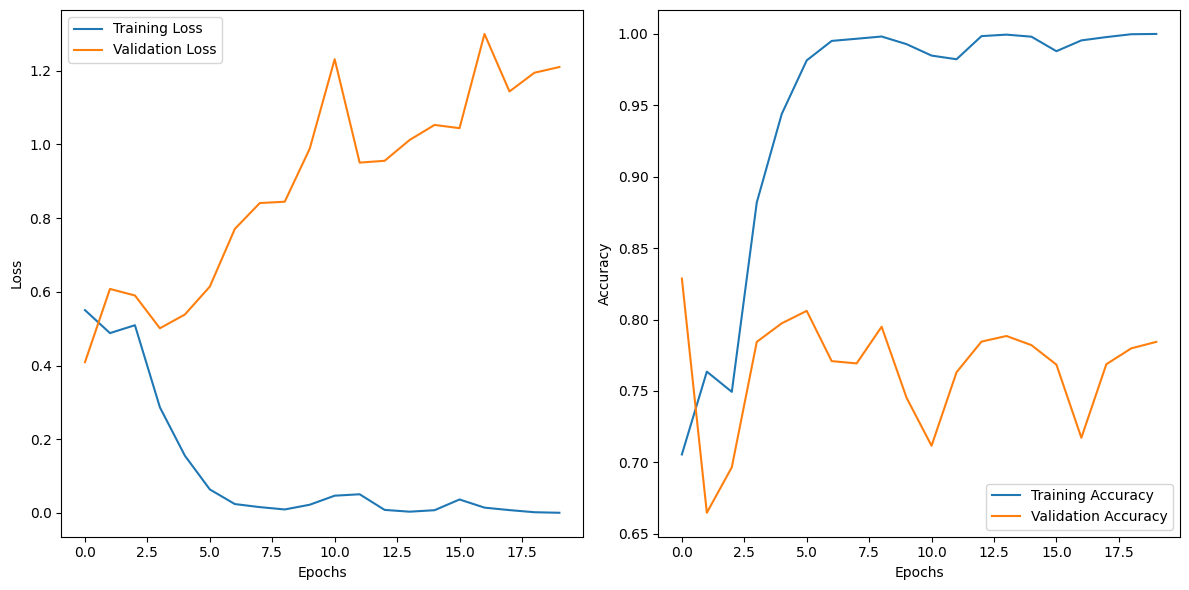

Model: LSTM
Final Validation Accuracy: 0.8481199741363525


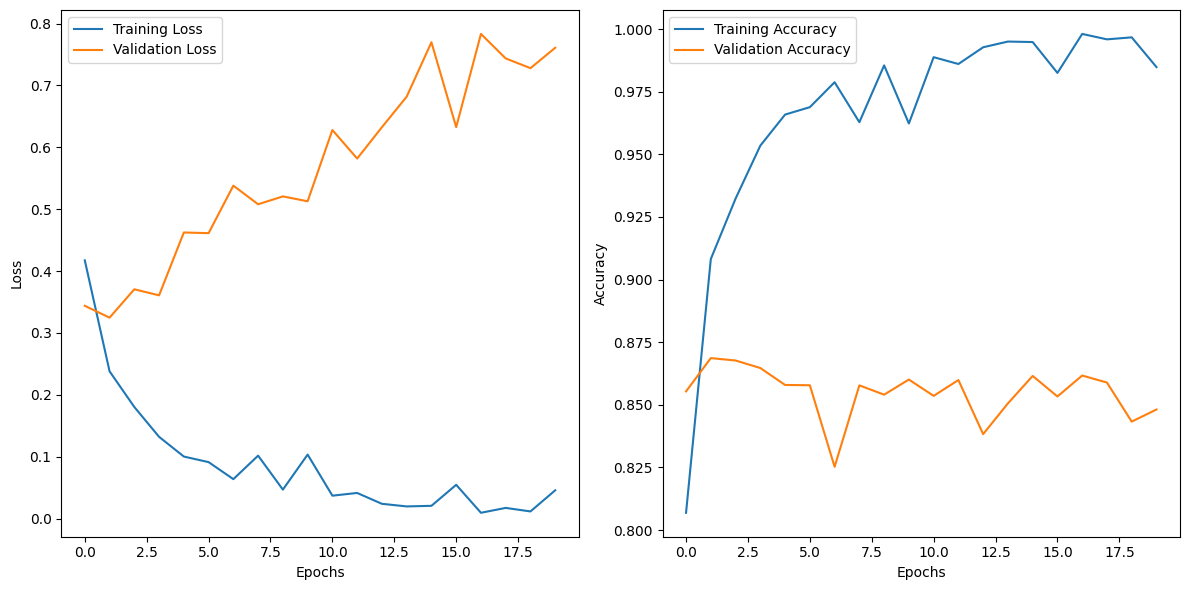

Model: Bidirectional LSTM
Final Validation Accuracy: 0.8562399744987488


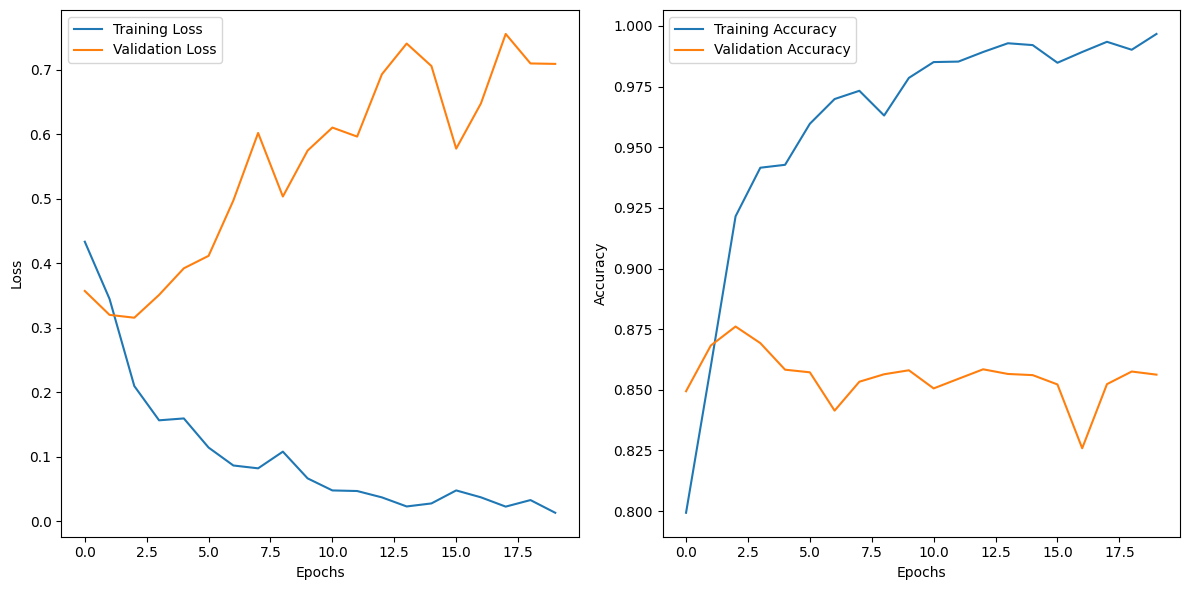

Model: Deep LSTM
Final Validation Accuracy: 0.8573600053787231


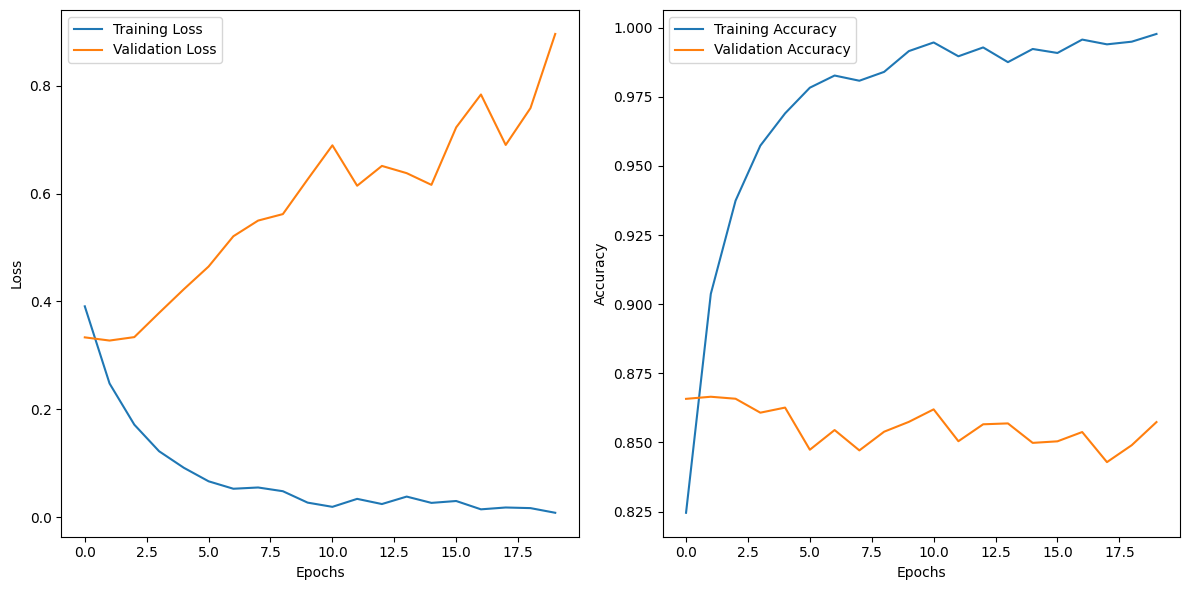

In [9]:
for name, history in histories:
    print(f"Model: {name}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Висновок
1. SimpleRNN - Найнижча точність серед усіх розглянутих моделей - близько 78%.
Використовується менше параметрів, і навчання пройшло швидше, але це вплинуло на точність.
2. LSTM - Значно краща точність порівняно з SimpleRNN - близько 85%.
Має більше параметрів і обчислювальну складність, але результат вищий.
3. Bidirectional LSTM - Досягла ще кращої точності порівняно зі звичайним LSTM - близько 86%.
Використовує двосторонні LSTM шари, що дозволяє покращити розуміння контексту.
4. Deep LSTM - Найвища точність серед усіх розглянутих моделей - близько 86%.
Використовує глибокий стек LSTM шарів, що дозволяє відтворити довготривалі залежності від контексту.


- Deep LSTM та Bidirectional LSTM досягають найкращих результатів точності на цьому датасеті.
- Звичайний LSTM є хорошим вибором з обмеженими обчислювальними ресурсами і більшими данними.
- SimpleRNN, хоча швидший у навчанні, надає найгіршу точність і, швидше за все, не найкращий вибір для текстової класифікації на цьому датасеті.